In [189]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

In [190]:
pd.options.display.max_rows = 10
data = pd.read_csv('RawData/Returns.csv', index_col="RIC")
#data.columns = pd.Index([data.columns[0]]).union(pd.to_datetime(data.columns[1:], dayfirst=True).date)
#data.columns = pd.to_datetime(data.columns, dayfirst=True, errors='coerce', format='%d/%m/%Y')
data.columns = pd.to_datetime(data.columns, dayfirst=True)
data

,1994-01-31,1994-02-28,1994-03-31,1994-04-30,1994-05-31,1994-06-30,1994-07-31,1994-08-31,1994-09-30,1994-10-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
RIC,,,,,,,,,,,,,,,,,,,,,
BAYGn.DE,0.674764,-2.144772,2.630137,8.094119,-6.985014,-5.789186,5.130435,4.494072,-9.894459,2.342606,...,7.661612,3.472655,-4.347826,-0.524476,-1.796524,-6.253728,-0.296956,3.542176,-8.526813,5.570530
DTEGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.238190,-3.439952,6.212500,4.813464,-1.717943,2.867588,-3.398490,-7.576454,-3.047643,4.567616
MBGn.DE,-2.906287,-0.794136,5.541872,5.507585,76.313770,-9.055225,11.341345,3.722084,-11.303828,3.169252,...,14.732075,-0.832937,2.862930,-1.142182,-0.026560,-5.127524,7.420891,11.757039,-3.195708,-2.771378
ALVG.DE,-2.962206,-10.456140,0.783699,1.399689,-3.865612,-3.512397,5.310493,0.528670,-9.385113,5.138469,...,8.633634,-0.299470,4.054583,-2.390346,-0.142653,-5.247619,-2.080611,3.238555,-4.330102,7.903762
SIEGn.DE,-8.691824,-5.565505,475.504883,7.168459,-6.688963,-7.096774,5.169753,3.008070,-10.185185,-0.872324,...,9.392093,-0.842857,-4.451808,0.738842,-1.526718,7.037544,0.766828,-1.155581,0.712860,8.069083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCP.SG^C16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DWH.VI^C20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIGN.VI^H21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-40.000000,8.333333,1.538462,21.212121,-6.250000,0.000000,NaN,NaN,NaN,NaN


In [191]:
n = 0
for type in data.dtypes.values:
    if type.name != "float64":
        n += 1
if(n == 0):
    print(f"{n} rows have not the expected data type float64. Perfect!")
else:
    print(f"{n} rows dont have the expected data type float64. Check carefully!")
data.dtypes

0 rows have not the expected data type float64. Perfect!


1994-01-31    float64
1994-02-28    float64
1994-03-31    float64
1994-04-30    float64
1994-05-31    float64
               ...   
2021-08-31    float64
2021-09-30    float64
2021-10-31    float64
2021-11-30    float64
2021-12-31    float64
Length: 336, dtype: object

In [192]:
data[data.isna().any(axis=1)]

,1994-01-31,1994-02-28,1994-03-31,1994-04-30,1994-05-31,1994-06-30,1994-07-31,1994-08-31,1994-09-30,1994-10-31,...,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31
RIC,,,,,,,,,,,,,,,,,,,,,
DTEGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.238190,-3.439952,6.212500,4.813464,-1.717943,2.867588,-3.398490,-7.576454,-3.047643,4.567616
SAPG.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.259259,5.084746,...,2.312365,11.817659,-1.171264,4.686399,1.682935,5.478318,-8.300643,7.221081,-9.687201,10.355186
DPWGn.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.784705,4.783818,16.999405,2.795699,-0.435844,4.324987,-8.559919,-1.762115,-2.522422,8.376462
BTGGg.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.242152,4.093567,-2.105524,0.057637,-0.921659,1.162791,0.574713,1.714286,-0.280899,1.183099
FPE3_p.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-9.925011,8.570029,-4.567265,-0.869985,2.437835,1.999048,-5.692954,2.523503,-4.440154,0.808081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCP.SG^C16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DWH.VI^C20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SIGN.VI^H21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-40.000000,8.333333,1.538462,21.212121,-6.250000,0.000000,NaN,NaN,NaN,NaN


In [193]:
data.max()

1994-01-31      30.000000
1994-02-28     125.000000
1994-03-31     475.504883
1994-04-30    1021.381329
1994-05-31    1138.876427
                 ...     
2021-08-31     204.761905
2021-09-30     850.000000
2021-10-31     625.000000
2021-11-30     434.375000
2021-12-31     213.524590
Length: 336, dtype: float64

In [194]:
#pd.options.display.max_rows = 4000
#errors = data[(data[data.columns[1:]] > 300) | (data[data.columns[1:]] < -50)]
extremes = data[data[data.columns[1:]] > 300]
extremes.dropna(axis = 0, how = 'all', inplace = True)
extremes.dropna(axis = 1, how = 'all', inplace = True)
print(f"The return data contains {extremes.count().sum()} entries where the monthly return was above 300 %. These data points could be errors.")

The return data contains 394 entries where the monthly return was above 300 %. These data points could be errors.


In [195]:
pd.options.display.max_rows = 10
extremes

,1994-03-31,1994-04-30,1994-05-31,1994-06-30,1994-07-31,1994-12-31,1995-02-28,1995-03-31,1995-04-30,1995-05-31,...,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-05-31,2021-06-30,2021-09-30,2021-10-31,2021-11-30
RIC,,,,,,,,,,,,,,,,,,,,,
SIEGn.DE,475.504883,NaN,NaN,NaN,NaN,NaN,497.345516,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASFn.DE,NaN,1021.381329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1364.9943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HNKG_p.DE,NaN,NaN,NaN,1420.370187,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RWEG.DE,NaN,NaN,NaN,NaN,NaN,319.25353,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BEIG.DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DZEG.MU^I20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CPMG.PK^D14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KKFG.SG^B12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


-16.66666667

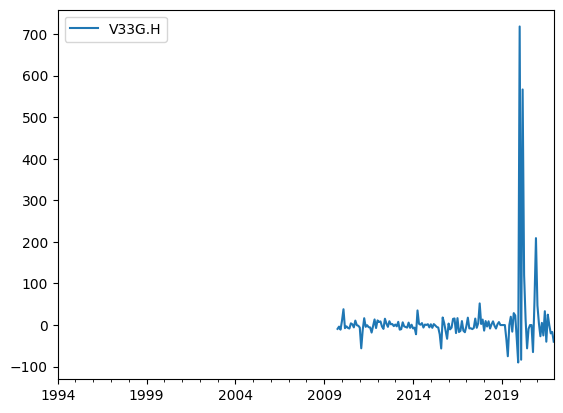

In [196]:
plot_data = data.T
plot_data.plot(y='V33G.H')
data.loc['V33G.H', '2021-11-30']

In [197]:
# This cell iterates through all the extreme positiv (return > 300 %) and checks if there are extreme negative returns the month befor or after so that the gains are almost completely compensated. In that chase there was probably a wrong price reported for the stock in that month and therefore wrong returns have been calculated. These retruns are set to NaN.
# The errors dataframe collected all the detected values as well as the return from the prio/next month. It was used for getting an overview over the data but is not necessary for further work.

extreme_count = 0
nan_count = 0
cleaned_data = data.copy(deep=True)
# errors = DataFrame.copy(extremes).drop(extremes.index)
for ric in extremes.index:
    for extreme_date in extremes.columns:
        extreme_val = extremes.loc[ric, extreme_date]
        if not np.isnan(extreme_val):
            prior_date = data.columns[data.columns.get_loc(extreme_date)-1]
            prior_val = data.loc[ric, prior_date]
            prior_calc = ((1+extreme_val/100)*(1+prior_val/100)-1)*100

            next_date = data.columns[data.columns.get_loc(extreme_date)+1]
            next_val = data.loc[ric, next_date]
            next_calc = ((1+extreme_val/100)*(1+next_val/100)-1)*100
            if (prior_calc < 50 and next_calc < 50) or (np.isnan(prior_calc) and np.isnan(next_calc)):
                # errors.at[ric, prior_date] = prior_val
                # errors.at[ric, extreme_date] = extreme_val
                # errors.at[ric, next_date] = next_val
                cleaned_data.at[ric, prior_date] = np.nan
                cleaned_data.at[ric, extreme_date] = np.nan
                cleaned_data.at[ric, next_date] = np.nan
                # print(f"[{ric}]\nPrior: {prior_val}   {prior_date}\nExtreme: {extreme_val}   {extreme_date}\nNext: {next_val}   {next_date}")
                if np.isnan(prior_calc) and np.isnan(next_calc):
                    nan_count += 1
                else:
                    extreme_count +=1
            elif prior_calc < 50 or np.isnan(prior_calc):
                # errors.at[ric, prior_date] = prior_val
                # errors.at[ric, extreme_date] = extreme_val
                cleaned_data.at[ric, prior_date] = np.nan
                cleaned_data.at[ric, extreme_date] = np.nan
                # print(f"[{ric}]\nPrior: {prior_val}   {prior_date}\nExtreme: {extreme_val}   {extreme_date}\nNext: {next_val}   {next_date}")
                if np.isnan(prior_calc):
                    nan_count += 1
                else:
                    extreme_count +=1
            elif next_calc < 50 or np.isnan(next_calc):
                # errors.at[ric, extreme_date] = extreme_val
                # errors.at[ric, next_date] = next_val
                cleaned_data.at[ric, extreme_date] = np.nan
                cleaned_data.at[ric, next_date] = np.nan
                # print(f"[{ric}]\nPrior: {prior_val}   {prior_date}\nExtreme: {extreme_val}   {extreme_date}\nNext: {next_val}   {next_date}")
                if np.isnan(next_calc):
                    nan_count += 1
                else:
                    extreme_count +=1
            
print(f"{nan_count} periods have been removed due to NaN values in the prior/next period. {extreme_count} periods have been removed due to extreme loss/gain that is compensated in the prior/next period. Both factors indicate errors.")

31 periods have been removed due to NaN values in the prior/next period. 75 periods have been removed due to extreme loss/gain that is compensated in the prior/next period. Both factors indicate errors.


-16.66666667

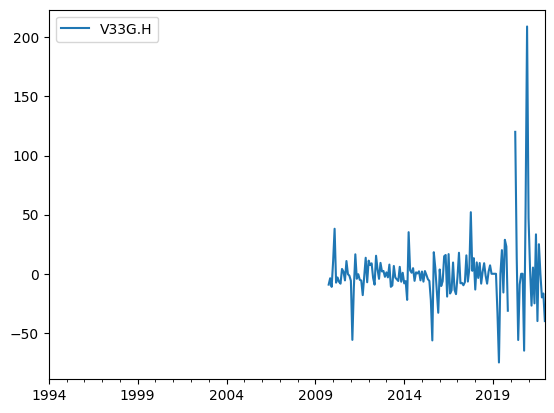

In [198]:
plot_data = cleaned_data.T
plot_data.plot(y='V33G.H')
cleaned_data.loc['V33G.H', '2021-11-30']

In [199]:
cleaned_data.to_pickle("UsableData/Returns.pkl")